# Método de Diferencias Finitas

![IPython](images/diferencias-finitas.png)

## Aplicaciones

### Ecuación de Advección Lineal (Se acuerdan?)

$$\frac{\partial u}{\partial t}+\alpha \frac{\partial u}{\partial x}=0$$

Aplicando un esquema hacia atrás en al espacio y adelante en el tiempo

$$\left.\frac{\partial u}{\partial x}\right\vert_{x_i}=\frac{u_i^t-u_{i-1}^t}{\Delta x}+O(\Delta x)$$

Ahora el tiempo

$$\left.\frac{\partial u}{\partial t}\right\vert_{x_i}=\frac{u_i^{t+1}-u_{i}^t}{\Delta t}+O(\Delta t)$$

Combinando ambas aproximaciones tenemos

$$\frac{u_i^{t+1}-u_{i}^t}{\Delta t}+\alpha \frac{u_i^t-u_{i-1}^t}{\Delta x}+O(\Delta x,\Delta t)=0$$

Despejando la velocidad variando en el tiempo

$$u_i^{t+1}=u_i^t-\frac{\alpha\Delta t}{\Delta x}(u_i^t-u_{i-1}^{t})+O(\Delta x,\Delta t)$$

In [ ]:
                                        ut[i] = u[i] - a*dt/dx*(u[i] - u[n - 1])

Pasemos esto a code en python y veamos que nos da. $\delta t$ es el paso de tiempo $t$ el tiempo e $i$ es es el punto de la grilla

In [2]:
#Modulos requeridos
import numpy as np
import matplotlib.pyplot as plt

Corremos ``advection_linear`` 
   - ``a``: Velocidad de advección, igual a ``1``,
   - ``L``: longitud de dominio igual a ``1``,
   - ``n``: Número de puntos en la grilla ``50``,
   - ``dt``: Paso de tiempo ``0.005``,
   - ``tf``: Tiempo final ``1``.

In [3]:
def advection_linear(a, L, n, dt, tf):
    '''Resuelve la expresion de advección lineal
    input:
    a:alpha velocidad
    L: Longitud
    n: número de elementos de la recta
    dt: delta de tiempo
    tf:tiempo final
    '''
    # Construimos la recta
    dx = L/n
    x = np.linspace(0, L - dx, n)

    # Solución inicial
    u = np.exp(-40*(x-1/2)**2)
    ut = np.zeros(u.shape)#creamos una vector u_t+1

    # Avance de la solución de tiempo
    t = 0
    while(t < tf):#se corta cuando llega al final
        for i in range(n):
            # condicion de borde para función periodica
            if i == 0:
                ut[i] = u[i] - a*dt/dx*(u[i] - u[n - 1])
            else:
                ut[i] = u[i] - a*dt/dx*(u[i] - u[i - 1])

        u[:] = ut[:]
        t += dt
        
    plt.plot(x, u, 'o-', markersize=2, label=f'$n={n}$')
    plt.xlabel('$x$')
    plt.ylabel('$u(x,t)$')
    plt.legend()

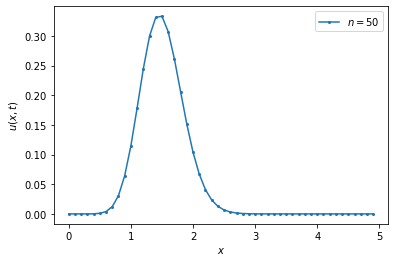

In [24]:
# asignamos variables
a = 1
L = 5
n = 50
dt = 0.005
tf = 1
advection_linear(a, L, n, dt, tf)

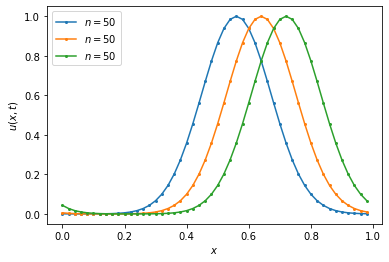

In [74]:
rango =  np.linspace(0.05, 0.2, 3, endpoint=True)

for tf in rango:
    advection_linear(a, L, n, dt, tf)

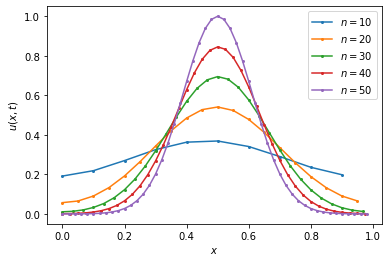

In [75]:
rango =  np.linspace(10, 50, 5, endpoint=True, dtype=int)

#Defino nuevamente el tiempo final fijo
tf =1

for n in rango:
    advection_linear(a, L, n, dt, tf)
    

Que observamos de los resultados?

## Ecuación de Burgers 

$$\frac{\partial u}{\partial t}+\frac{1}{2}\frac{\partial u^2}{\partial x}=0$$

Usamos la aproximación espacial de primer orden de Taylor en cada punto del dominio, y resolvemos:

$$\left.\frac{\partial u^2}{\partial x}\right\vert_{x_i}=\frac{(u_i^t)^2-(u^t_{i-1})^2}{\Delta x}+O (\Delta x)$$

usamos el metodo de upwind para el paso de timepo y obtenemos lo siguiente:

$$\left . \frac{\partial u}{\partial t}\right \vert_{x_i}=\frac{u_i^{t+1}-u_i^t}{\Delta t} +O(\Delta t)$$

Incluimos las dos derivadas en la ecuación de Burger

$$\frac{u_i^{t+1}-u_i^t}{\Delta t}+\frac{1}{2} \frac{(u_i^t)^2-(u^t_{i-1})^2}{\Delta x}+ O(\Delta x,\Delta t)=0$$

Resolvemos la ecuación previa para resolver la velocidad en el espacio de tiempo en cualquiepunto de la grilla

$$u_i^{t+1}=u_i^t-\frac{\Delta t}{\Delta x}\frac{1}{2}\left((u_i^t)^2-(u_{i-1}^t)^2\right)+O(\Delta x,\Delta t)$$

In [ ]:
Datos iniciales

tf
dt
L
n

In [ ]:
def function_burgers(L,n,dt,tf):
    dx=L/n
    
    #construyo x linspace
    
    #contruyo u, ut
    
    #while t<tf
    
    #expresion burgers
        #to
        #t restante
    #sobrenombrar u
    
    #adelantarla en el tiempo
        
    #plotear
    

In [ ]:
Nuevamente traducimos esto a python:
            ut[i] = u[i] - 0.5*dt/dx * (u[i]**2-u[n-1]**2)

   - ``L``: longitud de dominio igual a ``1``,
   - ``n``: Número de puntos en grilla igual a ``50``,
   - ``dt``: Paso de tiempo igual a ``0.005``,
   - ``tf``: Tiempo final ``0.5``.

In [77]:
def burgers(L, n, dt, tf):
    # Construimos la grilla
    dx = L/n
    x = np.linspace(0, L - dx, n)
    
    # Función de la solución analitica
    u = np.exp(-40*(x-1/2)**2)
    ut = np.zeros(u.shape)

    # Avance en solución de tiempo
    t = 0
    while(t < tf):
        for i in range(n):
            # Condición periodica de entrada en x=0
            if i == 0:
                ut[i] = u[i] - 0.5*dt/dx * (u[i]**2-u[n-1]**2)
            else:
                ut[i] = u[i] - 0.5*dt/dx * (u[i]**2-u[i-1]**2)

        u[:] = ut[:]
        t += dt
        
    plt.plot(x, u, 'o-', markersize=2, label=f'$n={n}$')
    plt.xlabel('$x$')
    plt.ylabel('$u(x,t)$')
    plt.legend()

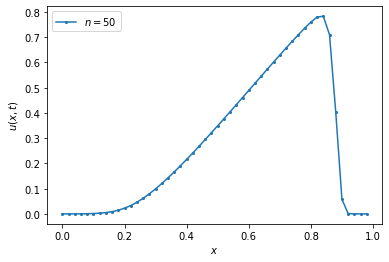

In [78]:
plt.figure(0)

# asignamos datos
L = 1
n = 50
dt = 0.005
tf = 0.5

burgers(L, n, dt, tf)

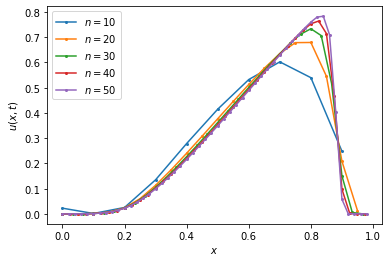

In [79]:
rango =  np.linspace(10, 50, 5, endpoint=True , dtype=int)


for n in rango:
    burgers(L, n, dt, tf)

## Difusion Lineal

$$\frac{\partial u}{\partial t}-\beta\frac{\partial ^2 u}{\partial x^2}=0$$

Aplicamos el esquema de segundo orden al termino espacial

$$\left .\frac{\partial^2 u}{\partial x^2}\right\vert_{x_i}=\frac{u_{i-1}-2u_i+u_{i+1}}{\Delta x^2}+O(\Delta x^2)$$

Hacemos lo mismo que hicimos antes con el tiempo

$$\left . \frac{\partial u}{\partial t}\right \vert_{x_i}=\frac{u_i^{t+1}-u_i^t}{\Delta t} +O(\Delta t)$$

Ahora reemplazamos en la ecuación de difusion lineal

$$\frac{u_i^{t+1}-u_i^t}{\Delta t}-\beta \frac{u_{i-1}-2u_i+u_{i+1}}{\Delta x^2}+ O(\Delta x^2,\Delta t)=0$$

Despejamos la expresión previa y obtenemos:

$$u_i^{t+1}=u_i^t+\frac{\beta \Delta t}{\Delta x^2}(u_{i-1}-2u_i+u_{t+1})+O(\Delta x^2,\Delta t)$$

In [ ]:
                                           ut[i] = u[i] + c*(u[n - 1] - 2*u[i] + u[i + 1])

In [82]:
def diffusion_linear(b, L, n, dt, tf):
    # construimos grilla
    dx = L/n
    x = np.linspace(0, L - dx, n)
    
    # Solución inicial
    u = np.exp(-40*(x - 1/2)**2)
    ut = np.zeros(u.shape)

    # avance solución de tiempo
    t = 0
    c = b*dt/dx**2
    while(t < tf):
        for i in range(n):
            if i == 0:
                # condición de frontera periodica x=0
                ut[i] = u[i] + c*(u[n - 1] - 2*u[i] + u[i + 1])
            elif i == n - 1:
                # condición de frontera periodica x=L
                ut[i] = u[i] + c*(u[i - 1] - 2*u[i] + u[0])
            else:
                ut[i] = u[i] + c*(u[i - 1] - 2*u[i] + u[i + 1])
        u[:] = ut[:]
        t += dt
    
    plt.plot(x, u, 'o-', markersize=2, label=f'$n={n}$')
    plt.xlabel('$x$')
    plt.ylabel('$u(x,t)$')
    plt.legend()

Ahora corramos``difussion_linear`` 
   - ``b``: Coeficiente de difusión igual a ``1e-2``,
   - ``L``: Longitud de dominio igual a ``1``,
   - ``n``: Numero de puntos de grilla igual a ``50``,
   - ``dt``: Paso de tiempo igual a ``0.001``,
   - ``tf``: Paso final de tiempo ``5``.

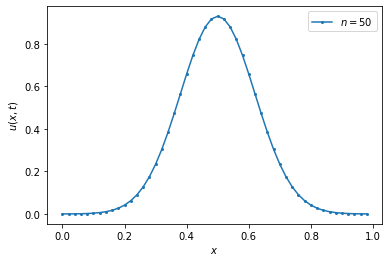

In [100]:
plt.figure(0)

# asignamos las variables
b = 1e-3
L = 1
n = 50
dt = 0.001
tf = 1
diffusion_linear(b, L, n, dt, tf)

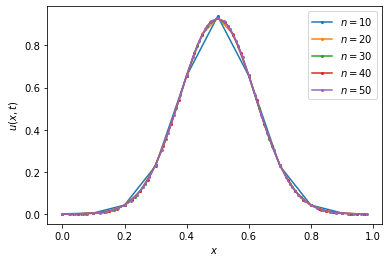

In [102]:
rango =  np.linspace(10, 50, 5, endpoint=True , dtype=int)

for n in rango:
    diffusion_linear(b, L, n, dt, tf)